In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [8]:
# Step 1: Load dataset
df = pd.read_csv('/content/diabetes.csv')

In [9]:
# Step 2: Label Encode if any categorical columns
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [10]:
# Step 2: Data Info
print(df.info())
print(df.head())
print(df.tail())
print(df.describe())
print("Missing values:\n", df.isnull().sum())
print("Duplicates:", df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8     

In [11]:
# Step 3: Statistical methods
print("Mean:\n", df.mean())
print("Median:\n", df.median())
print("Standard Deviation:\n", df.std())
print("Variance:\n", df.var())
print("Correlation:\n", df.corr())

Mean:
 Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64
Median:
 Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                23.0000
Insulin                      30.5000
BMI                          32.0000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64
Standard Deviation:
 Pregnancies                   3.369578
Glucose                      31.972618
BloodPressure                19.355807
SkinThickness                15.952218
Insulin                     115.244002
BMI                           7.884160
DiabetesPedigre

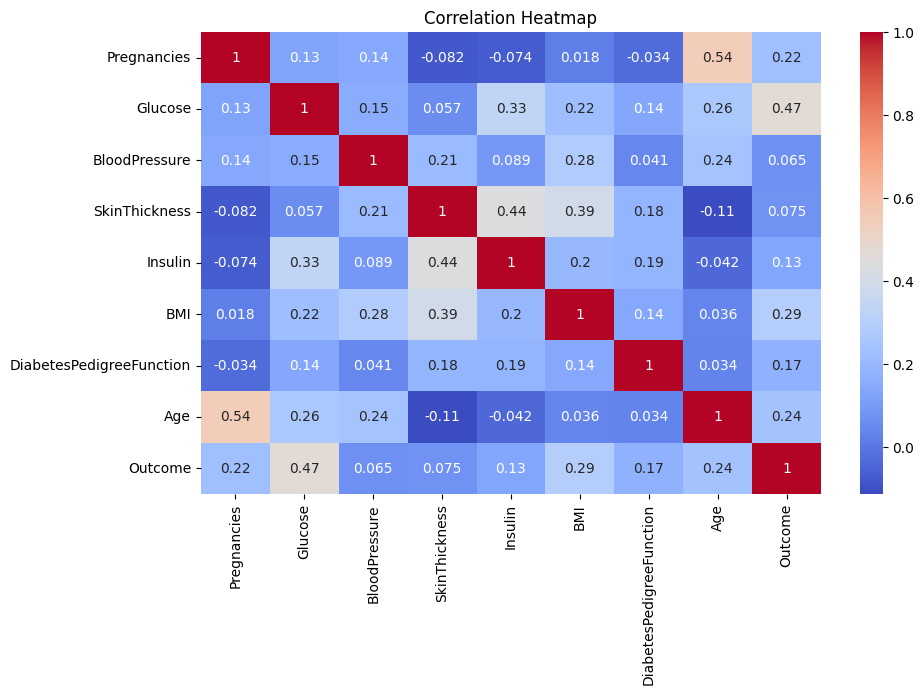

<ipython-input-12-094c21e38dfd>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Outcome", data=df, palette="Set2")


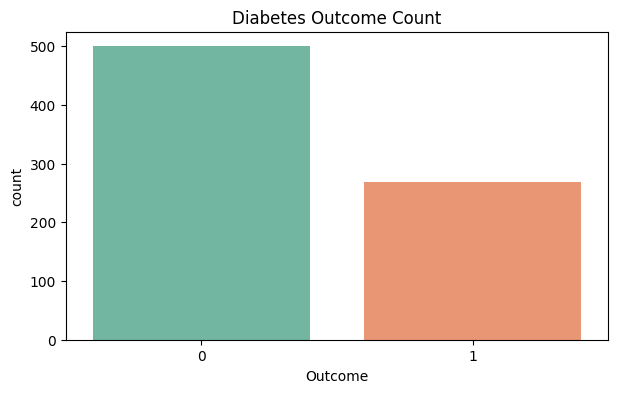

In [12]:
# Step 4: Data Visualization
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Histogram for outcome
plt.figure(figsize=(7, 4))
sns.countplot(x="Outcome", data=df, palette="Set2")
plt.title("Diabetes Outcome Count")
plt.show()

In [13]:
# Step 5: Data Splitting
X = df.drop(columns=["Outcome"])
y = df["Outcome"]

# Normalize Features
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
from sklearn.neighbors import KNeighborsClassifier
# 8. Model Training
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=18)

In [31]:
# 9. Predictions and Confusion Matrix
y_pred = knn.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[89 10]
 [26 29]]


In [32]:
# 10. Accuracy, Precision, Recall, F1-Score
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.90      0.83        99
           1       0.74      0.53      0.62        55

    accuracy                           0.77       154
   macro avg       0.76      0.71      0.72       154
weighted avg       0.76      0.77      0.76       154

Accuracy: 0.7662337662337663


In [33]:
# 11. Cross-validation
cv_scores = cross_val_score(knn, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

Cross-Validation Scores: [0.75974026 0.72077922 0.75324675 0.78431373 0.75816993]
Mean CV Accuracy: 0.7552499787793905


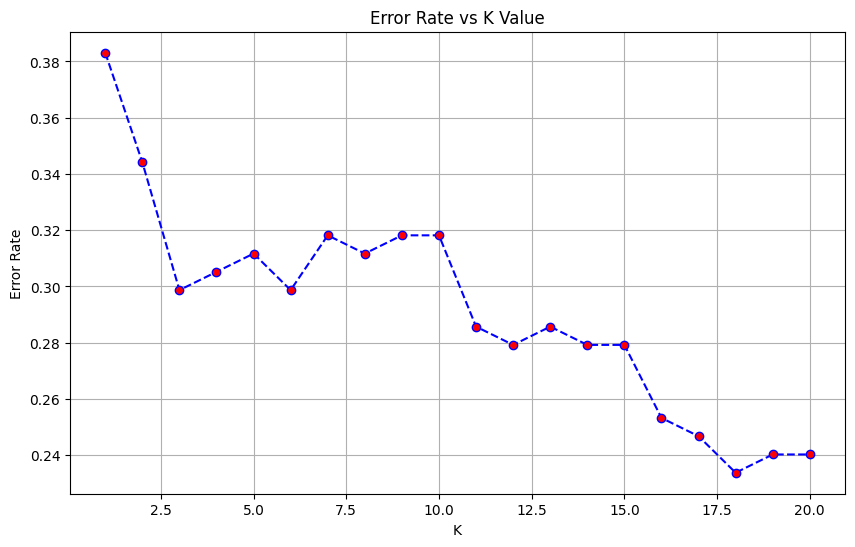

Best K value: 18
Final Accuracy with best K: 0.7662337662337663
Confusion Matrix:
 [[89 10]
 [26 29]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.90      0.83        99
           1       0.74      0.53      0.62        55

    accuracy                           0.77       154
   macro avg       0.76      0.71      0.72       154
weighted avg       0.76      0.77      0.76       154



In [34]:
# Step 9: Optimal K value using Error Rate
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
k_range = range(1, 21)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred_k = knn.predict(X_test)
    error_rate.append(np.mean(pred_k != y_test))

# Step 10: Plotting Error Rate vs K
plt.figure(figsize=(10,6))
plt.plot(k_range, error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red')
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid(True)
plt.show()

# Step 11: Best K
best_k = error_rate.index(min(error_rate)) + 1
print(f"Best K value: {best_k}")

# Step 12: Retrain with best K
best_model = KNeighborsClassifier(n_neighbors=best_k)
best_model.fit(X_train, y_train)
final_pred = best_model.predict(X_test)

print("Final Accuracy with best K:", accuracy_score(y_test, final_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, final_pred))
print("Classification Report:\n", classification_report(y_test, final_pred))

Original DataFrame with missing values:
     Age   Salary
0  25.0  50000.0
1  30.0  60000.0
2   NaN  55000.0
3  45.0      NaN
4  50.0  75000.0
5   NaN  70000.0
6  35.0      NaN

DataFrame after filling missing values with mean:
     Age   Salary
0  25.0  50000.0
1  30.0  60000.0
2  37.0  55000.0
3  45.0  62000.0
4  50.0  75000.0
5  37.0  70000.0
6  35.0  62000.0


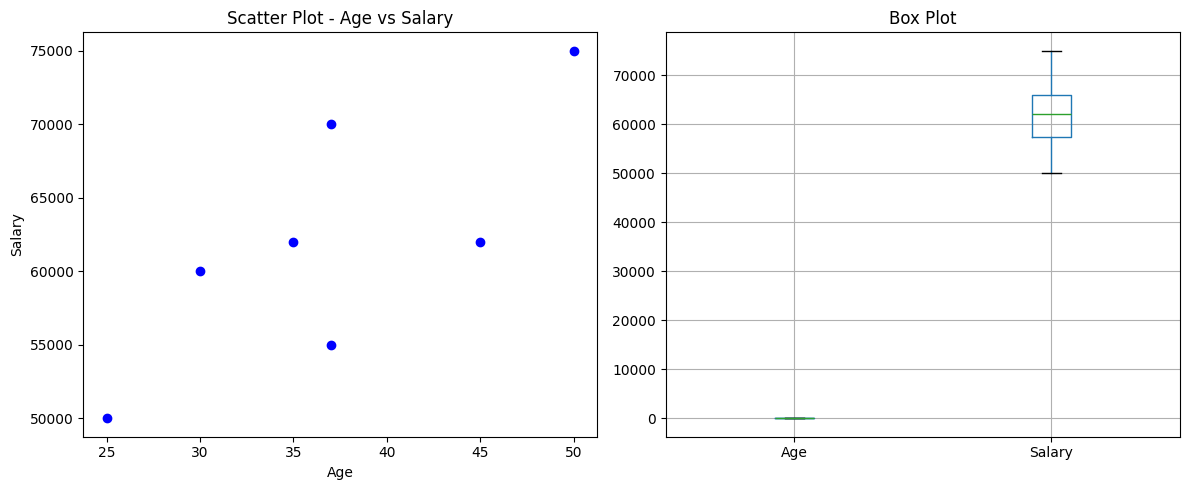

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Create a simple DataFrame with missing values
data = {
    'Age': [25, 30, np.nan, 45, 50, np.nan, 35],
    'Salary': [50000, 60000, 55000, np.nan, 75000, 70000, np.nan]
}
df = pd.DataFrame(data)

print("Original DataFrame with missing values:\n", df)

# Step 2: Handle missing values (main method used: fill with mean)
df_filled = df.fillna(df.mean(numeric_only=True))

# --- Other handling methods (mentioned in comments):
# df_dropped = df.dropna()  # 1. Remove rows with any missing values
# df_filled_constant = df.fillna(0)  # 2. Replace all NaNs with a constant (e.g., 0)
# df_filled_ffill = df.fillna(method='ffill')  # 3. Forward fill the missing values

print("\nDataFrame after filling missing values with mean:\n", df_filled)

# Step 3: Scatter Plot (Age vs Salary)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(df_filled['Age'], df_filled['Salary'], color='blue')
plt.title('Scatter Plot - Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')

# Step 4: Box Plot (for both Age and Salary)
plt.subplot(1, 2, 2)
df_filled.boxplot(column=['Age', 'Salary'])
plt.title('Box Plot')

plt.tight_layout()
plt.show()
